In [231]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

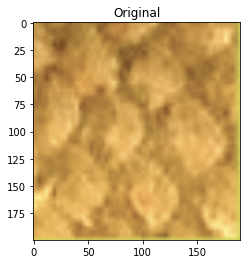

In [232]:
#source: https://realpython.com/python-opencv-color-spaces/
image = cv2.imread('Scale_images/S2.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title('Original')
plt.show()

In [233]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

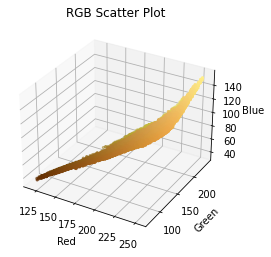

In [234]:
#Construct scatter plot in RGB
r, g, b = cv2.split(image)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = image.reshape((np.shape(image)[0]*np.shape(image)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.title('RGB Scatter Plot')
plt.show()

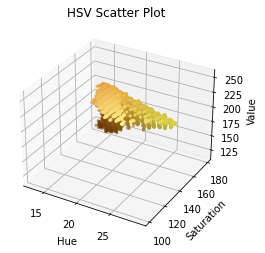

In [235]:
#Construct scatter plot in HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_image)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.title('HSV Scatter Plot')
plt.show()

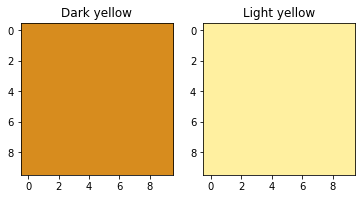

In [236]:
#The RGB scatter plot appeared more useful than HSV, so the rest of the code uses RGB 
#Choose range
light_yellow = (255, 240, 160)
dark_yellow = (215, 140, 30)
ly_square = np.full((10, 10, 3), light_yellow, dtype=np.uint8) / 255.0
dy_square = np.full((10, 10, 3), dark_yellow, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(dy_square)
plt.title('Dark yellow')
plt.subplot(1, 2, 2)
plt.imshow(ly_square)
plt.title('Light yellow')
plt.show()

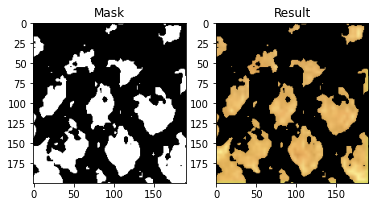

In [237]:
#Apply thresholding using selected range
mask = cv2.inRange(image, dark_yellow, light_yellow)
result = cv2.bitwise_and(image, image, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.title('Mask')
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title('Result')
plt.show()